## Importing Libs

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests 
from bs4 import BeautifulSoup
import json
from pprint import pprint
import matplotlib.image as mpimg
import matplotlib.patches as patches
from PIL import Image
from io import BytesIO
import highlight_text
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
from mplsoccer import Pitch, VerticalPitch
import matplotlib.image as mpimg
import matplotlib.patches as patches
from PIL import Image
from io import BytesIO
from mplsoccer import PyPizza, add_image, FontManager
from matplotlib.patches import Rectangle
import matplotlib.font_manager as font_manager
import matplotlib.image as mpimg
import matplotlib.patches as patches
from PIL import Image
from io import BytesIO
from mplsoccer import PyPizza, add_image, FontManager
#import soccerdata as sd
import re
from unidecode import unidecode
from scipy.spatial import ConvexHull
from matplotlib.colors import LinearSegmentedColormap
from highlight_text import ax_text, fig_text
import matplotlib.patheffects as path_effects
from scipy.ndimage import gaussian_filter
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patheffects as path_effects


from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
import main
import visuals
import seaborn as sns
import requests
import utils
import os
%load_ext autoreload
%autoreload 2

pd.set_option("display.max_rows", None, "display.max_columns", None)
#background = "#010b14"
background = "white"
text_color = 'black'
primary = '#C8102E'
secondary = 'lightblue'
mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color

In [2]:
import matplotlib.font_manager as fm
from mplsoccer import FontManager

# Set the path to the locally downloaded font file
font_path = r'C:\Users\acer\Documents\GitHub\IndianCitizen\ScorePredict\Score Logos-20241022T100701Z-001\Score Logos\Sora_Font\Sora-Regular.ttf'

# Add the font to matplotlib
font_prop = fm.FontProperties(fname=font_path)

# You can now use this font in your plots
fm_sora = FontManager()
#fm_sora.prop = font_prop

print("Font loaded and registered successfully!")

Font loaded and registered successfully!


## Data Extraction

### WhoScored

In [3]:
import glob
import os
import pandas as pd

# Specify the root directory containing all subfolders
root_folder = "D:/Scrape-Whoscored-Event-Data/data/"

# Use glob to get all CSV file paths recursively from subdirectories
csv_files = glob.glob(os.path.join(root_folder, "**", "*.csv"), recursive=True)

# List to hold the DataFrames
dataframes = []

# Loop through the CSV files and read them into DataFrames
for file in csv_files:
    print(f"Reading: {file}")
    dfi = pd.read_csv(file)  # Read the CSV file
    dataframes.append(dfi)   # Append the DataFrame to the list

# Check if any CSV files were found
if dataframes:
    # Concatenate all DataFrames into a single DataFrame
    df = pd.concat(dataframes, ignore_index=True)
    print("All CSV files successfully merged into a single DataFrame.")
else:
    print("No CSV files found in the specified directory.")

Reading: D:/Scrape-Whoscored-Event-Data/data\bundesliga\bundesliga_events1.csv


C:\Users\acer\AppData\Local\Temp\ipykernel_24132\430360680.py:17: DtypeWarning: Columns (259) have mixed types. Specify dtype option on import or set low_memory=False.
  dfi = pd.read_csv(file)  # Read the CSV file


Reading: D:/Scrape-Whoscored-Event-Data/data\bundesliga\bundesliga_events2.csv


C:\Users\acer\AppData\Local\Temp\ipykernel_24132\430360680.py:17: DtypeWarning: Columns (259) have mixed types. Specify dtype option on import or set low_memory=False.
  dfi = pd.read_csv(file)  # Read the CSV file


Reading: D:/Scrape-Whoscored-Event-Data/data\bundesliga\bundesliga_events3.csv


C:\Users\acer\AppData\Local\Temp\ipykernel_24132\430360680.py:17: DtypeWarning: Columns (37,259) have mixed types. Specify dtype option on import or set low_memory=False.
  dfi = pd.read_csv(file)  # Read the CSV file


Reading: D:/Scrape-Whoscored-Event-Data/data\bundesliga\bundesliga_events4.csv
Reading: D:/Scrape-Whoscored-Event-Data/data\bundesliga\bundesliga_events_2025-03-19.csv


C:\Users\acer\AppData\Local\Temp\ipykernel_24132\430360680.py:17: DtypeWarning: Columns (259) have mixed types. Specify dtype option on import or set low_memory=False.
  dfi = pd.read_csv(file)  # Read the CSV file


Reading: D:/Scrape-Whoscored-Event-Data/data\bundesliga\bundesliga_events_2025-04-01.csv
Reading: D:/Scrape-Whoscored-Event-Data/data\bundesliga\bundesliga_events_2025-04-09.csv


C:\Users\acer\AppData\Local\Temp\ipykernel_24132\430360680.py:17: DtypeWarning: Columns (38) have mixed types. Specify dtype option on import or set low_memory=False.
  dfi = pd.read_csv(file)  # Read the CSV file


Reading: D:/Scrape-Whoscored-Event-Data/data\bundesliga\bundesliga_events_2025-04-16.csv


C:\Users\acer\AppData\Local\Temp\ipykernel_24132\430360680.py:17: DtypeWarning: Columns (37,259) have mixed types. Specify dtype option on import or set low_memory=False.
  dfi = pd.read_csv(file)  # Read the CSV file


Reading: D:/Scrape-Whoscored-Event-Data/data\bundesliga\bundesliga_events_2025-04-22.csv
Reading: D:/Scrape-Whoscored-Event-Data/data\bundesliga\bundesliga_events_2025-04-29.csv
Reading: D:/Scrape-Whoscored-Event-Data/data\bundesliga\bundesliga_events_2025-05-07.csv


C:\Users\acer\AppData\Local\Temp\ipykernel_24132\430360680.py:17: DtypeWarning: Columns (259) have mixed types. Specify dtype option on import or set low_memory=False.
  dfi = pd.read_csv(file)  # Read the CSV file


Reading: D:/Scrape-Whoscored-Event-Data/data\champions-league\champions-league_events_2025-04-17.csv


C:\Users\acer\AppData\Local\Temp\ipykernel_24132\430360680.py:17: DtypeWarning: Columns (259) have mixed types. Specify dtype option on import or set low_memory=False.
  dfi = pd.read_csv(file)  # Read the CSV file


Reading: D:/Scrape-Whoscored-Event-Data/data\champions-league\champions-league_events_2025-05-01.csv


C:\Users\acer\AppData\Local\Temp\ipykernel_24132\430360680.py:17: DtypeWarning: Columns (259) have mixed types. Specify dtype option on import or set low_memory=False.
  dfi = pd.read_csv(file)  # Read the CSV file


Reading: D:/Scrape-Whoscored-Event-Data/data\champions-league\ucl_events1.csv


C:\Users\acer\AppData\Local\Temp\ipykernel_24132\430360680.py:17: DtypeWarning: Columns (22,36,259) have mixed types. Specify dtype option on import or set low_memory=False.
  dfi = pd.read_csv(file)  # Read the CSV file


Reading: D:/Scrape-Whoscored-Event-Data/data\eredivisie\eredivisie_events_2025-04-02.csv


C:\Users\acer\AppData\Local\Temp\ipykernel_24132\430360680.py:17: DtypeWarning: Columns (31,259) have mixed types. Specify dtype option on import or set low_memory=False.
  dfi = pd.read_csv(file)  # Read the CSV file


Reading: D:/Scrape-Whoscored-Event-Data/data\eredivisie\eredivisie_events_2025-04-02_2.csv


C:\Users\acer\AppData\Local\Temp\ipykernel_24132\430360680.py:17: DtypeWarning: Columns (36,259) have mixed types. Specify dtype option on import or set low_memory=False.
  dfi = pd.read_csv(file)  # Read the CSV file


Reading: D:/Scrape-Whoscored-Event-Data/data\eredivisie\eredivisie_events_2025-04-02_3.csv


C:\Users\acer\AppData\Local\Temp\ipykernel_24132\430360680.py:17: DtypeWarning: Columns (37,259) have mixed types. Specify dtype option on import or set low_memory=False.
  dfi = pd.read_csv(file)  # Read the CSV file


Reading: D:/Scrape-Whoscored-Event-Data/data\laliga\laliga_events.csv


C:\Users\acer\AppData\Local\Temp\ipykernel_24132\430360680.py:17: DtypeWarning: Columns (37,259) have mixed types. Specify dtype option on import or set low_memory=False.
  dfi = pd.read_csv(file)  # Read the CSV file


Reading: D:/Scrape-Whoscored-Event-Data/data\laliga\laliga_events2.csv


C:\Users\acer\AppData\Local\Temp\ipykernel_24132\430360680.py:17: DtypeWarning: Columns (37,259) have mixed types. Specify dtype option on import or set low_memory=False.
  dfi = pd.read_csv(file)  # Read the CSV file


Reading: D:/Scrape-Whoscored-Event-Data/data\laliga\laliga_events3.csv


C:\Users\acer\AppData\Local\Temp\ipykernel_24132\430360680.py:17: DtypeWarning: Columns (259) have mixed types. Specify dtype option on import or set low_memory=False.
  dfi = pd.read_csv(file)  # Read the CSV file


Reading: D:/Scrape-Whoscored-Event-Data/data\laliga\laliga_events4.csv
Reading: D:/Scrape-Whoscored-Event-Data/data\laliga\laliga_events5.csv
Reading: D:/Scrape-Whoscored-Event-Data/data\laliga\laliga_events6.csv
Reading: D:/Scrape-Whoscored-Event-Data/data\laliga\laliga_events_2025-03-19.csv


C:\Users\acer\AppData\Local\Temp\ipykernel_24132\430360680.py:17: DtypeWarning: Columns (259) have mixed types. Specify dtype option on import or set low_memory=False.
  dfi = pd.read_csv(file)  # Read the CSV file


Reading: D:/Scrape-Whoscored-Event-Data/data\laliga\laliga_events_2025-04-01.csv


C:\Users\acer\AppData\Local\Temp\ipykernel_24132\430360680.py:17: DtypeWarning: Columns (259) have mixed types. Specify dtype option on import or set low_memory=False.
  dfi = pd.read_csv(file)  # Read the CSV file


Reading: D:/Scrape-Whoscored-Event-Data/data\laliga\laliga_events_2025-04-09.csv
Reading: D:/Scrape-Whoscored-Event-Data/data\laliga\laliga_events_2025-04-16.csv


C:\Users\acer\AppData\Local\Temp\ipykernel_24132\430360680.py:17: DtypeWarning: Columns (259) have mixed types. Specify dtype option on import or set low_memory=False.
  dfi = pd.read_csv(file)  # Read the CSV file


Reading: D:/Scrape-Whoscored-Event-Data/data\laliga\laliga_events_2025-04-22.csv


C:\Users\acer\AppData\Local\Temp\ipykernel_24132\430360680.py:17: DtypeWarning: Columns (259) have mixed types. Specify dtype option on import or set low_memory=False.
  dfi = pd.read_csv(file)  # Read the CSV file


Reading: D:/Scrape-Whoscored-Event-Data/data\laliga\laliga_events_2025-05-01.csv
Reading: D:/Scrape-Whoscored-Event-Data/data\laliga\laliga_events_2025-05-07.csv


C:\Users\acer\AppData\Local\Temp\ipykernel_24132\430360680.py:17: DtypeWarning: Columns (259) have mixed types. Specify dtype option on import or set low_memory=False.
  dfi = pd.read_csv(file)  # Read the CSV file


Reading: D:/Scrape-Whoscored-Event-Data/data\ligue-1\ligue-1_events_2025-04-01.csv
Reading: D:/Scrape-Whoscored-Event-Data/data\ligue-1\ligue-1_events_2025-04-09.csv


C:\Users\acer\AppData\Local\Temp\ipykernel_24132\430360680.py:17: DtypeWarning: Columns (259) have mixed types. Specify dtype option on import or set low_memory=False.
  dfi = pd.read_csv(file)  # Read the CSV file


Reading: D:/Scrape-Whoscored-Event-Data/data\ligue-1\ligue-1_events_2025-04-16.csv
Reading: D:/Scrape-Whoscored-Event-Data/data\ligue-1\ligue-1_events_2025-04-23.csv


C:\Users\acer\AppData\Local\Temp\ipykernel_24132\430360680.py:17: DtypeWarning: Columns (259) have mixed types. Specify dtype option on import or set low_memory=False.
  dfi = pd.read_csv(file)  # Read the CSV file


Reading: D:/Scrape-Whoscored-Event-Data/data\ligue-1\ligue-1_events_2025-05-07.csv


C:\Users\acer\AppData\Local\Temp\ipykernel_24132\430360680.py:17: DtypeWarning: Columns (259) have mixed types. Specify dtype option on import or set low_memory=False.
  dfi = pd.read_csv(file)  # Read the CSV file


Reading: D:/Scrape-Whoscored-Event-Data/data\ligue-1\ligue1_events1.csv


C:\Users\acer\AppData\Local\Temp\ipykernel_24132\430360680.py:17: DtypeWarning: Columns (35,259) have mixed types. Specify dtype option on import or set low_memory=False.
  dfi = pd.read_csv(file)  # Read the CSV file


Reading: D:/Scrape-Whoscored-Event-Data/data\ligue-1\ligue1_events2.csv


C:\Users\acer\AppData\Local\Temp\ipykernel_24132\430360680.py:17: DtypeWarning: Columns (259) have mixed types. Specify dtype option on import or set low_memory=False.
  dfi = pd.read_csv(file)  # Read the CSV file


Reading: D:/Scrape-Whoscored-Event-Data/data\ligue-1\ligue1_events3.csv


C:\Users\acer\AppData\Local\Temp\ipykernel_24132\430360680.py:17: DtypeWarning: Columns (259) have mixed types. Specify dtype option on import or set low_memory=False.
  dfi = pd.read_csv(file)  # Read the CSV file


Reading: D:/Scrape-Whoscored-Event-Data/data\ligue-1\ligue1_events4.csv
Reading: D:/Scrape-Whoscored-Event-Data/data\ligue-1\ligue1_events_2025-03-18.csv


C:\Users\acer\AppData\Local\Temp\ipykernel_24132\430360680.py:17: DtypeWarning: Columns (259) have mixed types. Specify dtype option on import or set low_memory=False.
  dfi = pd.read_csv(file)  # Read the CSV file


Reading: D:/Scrape-Whoscored-Event-Data/data\premier-league\pl_events1.csv


C:\Users\acer\AppData\Local\Temp\ipykernel_24132\430360680.py:17: DtypeWarning: Columns (259) have mixed types. Specify dtype option on import or set low_memory=False.
  dfi = pd.read_csv(file)  # Read the CSV file


Reading: D:/Scrape-Whoscored-Event-Data/data\premier-league\pl_events2.csv


C:\Users\acer\AppData\Local\Temp\ipykernel_24132\430360680.py:17: DtypeWarning: Columns (259) have mixed types. Specify dtype option on import or set low_memory=False.
  dfi = pd.read_csv(file)  # Read the CSV file


Reading: D:/Scrape-Whoscored-Event-Data/data\premier-league\pl_events3.csv


C:\Users\acer\AppData\Local\Temp\ipykernel_24132\430360680.py:17: DtypeWarning: Columns (37,259) have mixed types. Specify dtype option on import or set low_memory=False.
  dfi = pd.read_csv(file)  # Read the CSV file


Reading: D:/Scrape-Whoscored-Event-Data/data\premier-league\pl_events4.csv
Reading: D:/Scrape-Whoscored-Event-Data/data\premier-league\premier-league_events_2025-03-18.csv


C:\Users\acer\AppData\Local\Temp\ipykernel_24132\430360680.py:17: DtypeWarning: Columns (36,38,40) have mixed types. Specify dtype option on import or set low_memory=False.
  dfi = pd.read_csv(file)  # Read the CSV file


Reading: D:/Scrape-Whoscored-Event-Data/data\premier-league\premier-league_events_2025-04-04.csv
Reading: D:/Scrape-Whoscored-Event-Data/data\premier-league\premier-league_events_2025-04-09.csv


C:\Users\acer\AppData\Local\Temp\ipykernel_24132\430360680.py:17: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  dfi = pd.read_csv(file)  # Read the CSV file


Reading: D:/Scrape-Whoscored-Event-Data/data\premier-league\premier-league_events_2025-04-14.csv


C:\Users\acer\AppData\Local\Temp\ipykernel_24132\430360680.py:17: DtypeWarning: Columns (259) have mixed types. Specify dtype option on import or set low_memory=False.
  dfi = pd.read_csv(file)  # Read the CSV file


Reading: D:/Scrape-Whoscored-Event-Data/data\premier-league\premier-league_events_2025-04-16.csv


C:\Users\acer\AppData\Local\Temp\ipykernel_24132\430360680.py:17: DtypeWarning: Columns (259) have mixed types. Specify dtype option on import or set low_memory=False.
  dfi = pd.read_csv(file)  # Read the CSV file


Reading: D:/Scrape-Whoscored-Event-Data/data\premier-league\premier-league_events_2025-04-22.csv


C:\Users\acer\AppData\Local\Temp\ipykernel_24132\430360680.py:17: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  dfi = pd.read_csv(file)  # Read the CSV file


Reading: D:/Scrape-Whoscored-Event-Data/data\premier-league\premier-league_events_2025-04-25.csv
Reading: D:/Scrape-Whoscored-Event-Data/data\premier-league\premier-league_events_2025-04-29.csv


C:\Users\acer\AppData\Local\Temp\ipykernel_24132\430360680.py:17: DtypeWarning: Columns (259) have mixed types. Specify dtype option on import or set low_memory=False.
  dfi = pd.read_csv(file)  # Read the CSV file


Reading: D:/Scrape-Whoscored-Event-Data/data\premier-league\premier-league_events_2025-05-07.csv


C:\Users\acer\AppData\Local\Temp\ipykernel_24132\430360680.py:17: DtypeWarning: Columns (259) have mixed types. Specify dtype option on import or set low_memory=False.
  dfi = pd.read_csv(file)  # Read the CSV file


Reading: D:/Scrape-Whoscored-Event-Data/data\serie-a\serie-a_events_2025-03-19.csv


C:\Users\acer\AppData\Local\Temp\ipykernel_24132\430360680.py:17: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  dfi = pd.read_csv(file)  # Read the CSV file


Reading: D:/Scrape-Whoscored-Event-Data/data\serie-a\serie-a_events_2025-04-01.csv


C:\Users\acer\AppData\Local\Temp\ipykernel_24132\430360680.py:17: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  dfi = pd.read_csv(file)  # Read the CSV file


Reading: D:/Scrape-Whoscored-Event-Data/data\serie-a\serie-a_events_2025-04-09.csv


C:\Users\acer\AppData\Local\Temp\ipykernel_24132\430360680.py:17: DtypeWarning: Columns (259) have mixed types. Specify dtype option on import or set low_memory=False.
  dfi = pd.read_csv(file)  # Read the CSV file


Reading: D:/Scrape-Whoscored-Event-Data/data\serie-a\serie-a_events_2025-04-16.csv
Reading: D:/Scrape-Whoscored-Event-Data/data\serie-a\serie-a_events_2025-04-23.csv
Reading: D:/Scrape-Whoscored-Event-Data/data\serie-a\serie-a_events_2025-05-07.csv


C:\Users\acer\AppData\Local\Temp\ipykernel_24132\430360680.py:17: DtypeWarning: Columns (39,259) have mixed types. Specify dtype option on import or set low_memory=False.
  dfi = pd.read_csv(file)  # Read the CSV file


Reading: D:/Scrape-Whoscored-Event-Data/data\serie-a\serieA_events1.csv


C:\Users\acer\AppData\Local\Temp\ipykernel_24132\430360680.py:17: DtypeWarning: Columns (259) have mixed types. Specify dtype option on import or set low_memory=False.
  dfi = pd.read_csv(file)  # Read the CSV file


Reading: D:/Scrape-Whoscored-Event-Data/data\serie-a\serieA_events2.csv


C:\Users\acer\AppData\Local\Temp\ipykernel_24132\430360680.py:17: DtypeWarning: Columns (259) have mixed types. Specify dtype option on import or set low_memory=False.
  dfi = pd.read_csv(file)  # Read the CSV file


Reading: D:/Scrape-Whoscored-Event-Data/data\serie-a\serieA_events3.csv


C:\Users\acer\AppData\Local\Temp\ipykernel_24132\430360680.py:17: DtypeWarning: Columns (37,259) have mixed types. Specify dtype option on import or set low_memory=False.
  dfi = pd.read_csv(file)  # Read the CSV file


Reading: D:/Scrape-Whoscored-Event-Data/data\serie-a\serieA_events4.csv
Reading: D:/Scrape-Whoscored-Event-Data/data\serie-a\serieA_events5.csv


C:\Users\acer\AppData\Local\Temp\ipykernel_24132\430360680.py:17: DtypeWarning: Columns (259) have mixed types. Specify dtype option on import or set low_memory=False.
  dfi = pd.read_csv(file)  # Read the CSV file


All CSV files successfully merged into a single DataFrame.


## Data Transformation

### WhoScored

In [4]:
teams_dict = {
    65: 'Barcelona',
    63: 'Atletico Madrid',
    52: 'Real Madrid',
    53: 'Atletic Club',
    839: 'Villarreal',
    54: 'Real Betis',
    64: 'Rayo Vallecano',
    51: 'Mallorca',
    68: 'Real Sociedad',
    62: 'Celta Vigo',
    131: 'Osasuna',
    67: 'Sevilla',
    2783: 'Girona',
    819: 'Getafe',
    70: 'Espanyol',
    825: 'Leganes',
    838: 'Las Palmas',
    55 : 'Valencia',
    60 : 'Deportivo Alaves',
    58: 'Real Valladolid',
    13: 'Arsenal',
    161: 'Wolves',
    24: 'Aston Villa',
    211: 'Brighton',
    30: 'Tottenham',
    167: 'Man City',
    14: 'Leicester',
    18: 'Southampton',
    183: 'Bournemouth',
    26: 'Liverpool',
    23: 'Newcastle',
    15: 'Chelsea',
    174: 'Nottingham Forest',
    29: 'West Ham',
    32: 'Man Utd',
    170: 'Fulham',
    189: 'Brentford',
    162: 'Crystal Palace',
    31: 'Everton',
    165: 'Ipswich',
    37: 'Bayern Munich',
    36: 'Bayer Leverkusen',
    45: 'Eintracht Frankfurt',
    219: 'Mainz 05',
    50: 'Freiburg',
    7614: 'RB Leipzig',
    33: 'Wolfsburg',
    134: 'Borussia M.Gladbach',
    41: 'VfB Stuttgart',
    44: 'Borussia Dortmund',
    1730: 'Augsburg',
    42: 'Werder Bremen',
    1211: 'Hoffenheim',
    796: 'Union Berlin',
    283: 'St. Pauli',
    1206: 'Holstein Kiel',
    4852: 'FC Heidenheim',
    109: 'Bochum',
    75 : 'Inter',
    276 : 'Napoli',
    300 : 'Atalanta',
    87 : 'Juventus',
    77 : 'Lazio',
    71 : 'Bologna',
    73 : 'Fiorentina',
    84 : 'Roma',
    80 : 'AC Milan',
    86 : 'Udinese',
    72 : 'Torino',
    278 : 'Genoa',
    1290 : 'Como',
    76 : 'Verona',
    78 : 'Cagliari',
    79 : 'Lecce',
    24341 : 'Parma Calcio',
    272 : 'Empoli',
    85 : 'Venezia',
    269 : 'Monza',
    304 : 'PSG',
    249 : 'Marseille',
    613 : 'Nice',
    248 : 'Monaco',
    607 : 'Lille',
    228 : 'Lyon',
    148 : 'Strasbourg',
    246 : 'Toulouse',
    309 : 'Lens',
    2332 : 'Brest',
    313 : 'Rennes',
    308 : 'Auxerre',
    614 : 'Angers',
    302 : 'Nantes',
    950 : 'Reims',
    217 : 'Le Havre',
    145 : 'Saint-Etienne',
    311 : 'Montpellier',
    299 : 'Benfica',
    129 : 'PSV'
}

# temprary use of typeId of period column
df['period'] = df['period'].replace({'FirstHalf': 1, 'SecondHalf': 2, 'FirstPeriodOfExtraTime': 3, 'SecondPeriodOfExtraTime': 4,
                                     'PenaltyShootout': 5, 'PostGame': 14, 'PreMatch': 16})
# new column for cumulative minutes, This part is taken from the "jakeyk11.github.io" github repository and modified for my use
def cumulative_match_mins(events_df):
    events_out = pd.DataFrame()
    # Add cumulative time to events data, resetting for each unique match
    match_events = events_df.copy()
    match_events['cumulative_mins'] = match_events['minute'] + (1/60) * match_events['second']
    # Add time increment to cumulative minutes based on period of game.
    for period in np.arange(1, match_events['period'].max() + 1, 1):
        if period > 1:
            t_delta = match_events[match_events['period'] == period - 1]['cumulative_mins'].max() - \
                                   match_events[match_events['period'] == period]['cumulative_mins'].min()
        elif period == 1 or period == 5:
            t_delta = 0
        else:
            t_delta = 0
        match_events.loc[match_events['period'] == period, 'cumulative_mins'] += t_delta
    # Rebuild events dataframe
    events_out = pd.concat([events_out, match_events])
    return events_out

df = cumulative_match_mins(df)

df = df.sort_values(by='matchId')

# New Column for Team Names and Oppositon TeamNames
df['teamName'] = df['teamId'].map(teams_dict)
team_names = list(teams_dict.values())
#opposition_dict = {team_names[i]: team_names[1-i] for i in range(len(team_names))}
#df['oppositionTeamName'] = df['teamName'].map(opposition_dict)

# Reshaping the data from 100x100 to 105x68, as I use the pitch_type='uefa', in the pitch function, you can consider according to your use
df['x'] = df['x']*1.05
df['y'] = df['y']*0.68
df['endX'] = df['endX']*1.05
df['endY'] = df['endY']*0.68
df['goalMouthY'] = df['goalMouthY']*0.68

df['qualifiers'] = df['qualifiers'].astype(str)
# Calculating passing distance, to find out progressive pass, this will just show the distance reduced by a pass, then will be able to filter passes which has reduced distance value more than 10yds as a progressive pass
df['prog_pass'] = np.where((df['type'] == 'Pass'),
                           np.sqrt((105 - df['x'])**2 + (34 - df['y'])**2) - np.sqrt((105 - df['endX'])**2 + (34 - df['endY'])**2), 0)
# Calculating carrying distance, to find out progressive carry, this will just show the distance reduced by a carry, then will be able to filter carries which has reduced distance value more than 10yds as a progressive carry
df['prog_carry'] = np.where((df['type'] == 'Carry'),
                            np.sqrt((105 - df['x'])**2 + (34 - df['y'])**2) - np.sqrt((105 - df['endX'])**2 + (34 - df['endY'])**2), 0)
df['pass_or_carry_angle'] = np.degrees(np.arctan2(df['endY'] - df['y'], df['endX'] - df['x']))

# Making all the alphabets in the name as English Alphabets only (for example: Á will be replaced by A)
df['playerName'] = df['playerName'].astype(str)
df['playerName'] = df['playerName'].apply(unidecode)

# Function to extract short names
def get_short_name(full_name):
    if pd.isna(full_name):
        return full_name
    parts = full_name.split()
    if len(parts) == 1:
        return full_name  # No need for short name if there's only one word
    elif len(parts) == 2:
        return parts[0][0] + ". " + parts[1]
    else:
        return parts[0][0] + ". " + parts[1][0] + ". " + " ".join(parts[2:])

# Applying the function to create 'shortName' column
df['shortName'] = df['playerName'].apply(get_short_name)

df['qualifiers'] = df['qualifiers'].astype(str)
columns_to_drop2 = ['id']
df.drop(columns=columns_to_drop2, inplace=True)

df['period'] = df['period'].replace({1: 'FirstHalf', 2: 'SecondHalf', 3: 'FirstPeriodOfExtraTime', 4: 'SecondPeriodOfExtraTime',
                                     5: 'PenaltyShootout', 14: 'PostGame', 16: 'PreMatch'})

C:\Users\acer\AppData\Local\Temp\ipykernel_24132\2838005575.py:147: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dfxT['start_zone_value_xT'] = dfxT[['x1_bin_xT', 'y1_bin_xT']].apply(lambda x: xT[x[1]][x[0]], axis=1)
C:\Users\acer\AppData\Local\Temp\ipykernel_24132\2838005575.py:148: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dfxT['end_zone_value_xT'] = dfxT[['x2_bin_xT', 'y2_bin_xT']].apply(lambda x: xT[x[1]][x[0]], axis=1)


KeyError: 'index'

In [10]:
df_passes.shape

(1606108, 265)

In [13]:
df_passes = df[(df['type'] == 'Pass') & (df['outcomeType'] == 'Successful')]

conditions = [
    df_passes['passThroughBallAccurate'] == True,
    df_passes['passLongBallAccurate'] == True,
    df_passes['passCrossAccurate'] == True,
    df_passes['passHead'] == True,
    df_passes['passChipped'] == True
]


# Define corresponding pass types
pass_types = ['through_ball', 'long_ball', 'cross', 'header', 'chipped']

# Apply np.select to assign Pass_Type based on conditions
df_passes['Pass_Type'] = np.select(conditions, pass_types, default='ground_pass')

conditions2 = [
    df_passes['qualifiers'].str.contains('ThrowIn', na=False),
    df_passes['passCorner'] == True,
    df_passes['passFreekick'] == True
]

# Define corresponding pass types
play_patterns = ['throw_in', 'corner', 'freekick']

# Apply np.select to assign Pass_Type based on conditions
df_passes['Play_Pattern'] = np.select(conditions2, play_patterns, default='open_play')

df_passes['pass_distance'] = np.sqrt((df_passes['endX'] - df_passes['x'])**2 + 
                                     (df_passes['endY'] - df_passes['y'])**2)

df_passes['pass_angle'] = np.arctan2(df_passes['endY'] - df_passes['y'], df_passes['endX'] - df_passes['x'])

df_passes['Pass_Type'].fillna('Unknown', inplace=True)
df_passes['Play_Pattern'].fillna('Unknown', inplace=True)

C:\Users\acer\AppData\Local\Temp\ipykernel_24132\3032072032.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_passes['Pass_Type'] = np.select(conditions, pass_types, default='ground_pass')
C:\Users\acer\AppData\Local\Temp\ipykernel_24132\3032072032.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_passes['Play_Pattern'] = np.select(conditions2, play_patterns, default='open_play')
C:\Users\acer\AppData\Local\Temp\ipykernel_24132\3032072032.py:30: SettingWithCopyWarning: 
A value is trying to be s

In [17]:
final_df = df_passes[['x', 'y', 'outcomeType', 'endX', 'endY','teamName','assist', 'playerName', 'pass_angle','Pass_Type', 'Play_Pattern', 'pass_distance']]

### Statsbomb

In [104]:
df_statsbomb.columns

Index(['id', 'index', 'period', 'timestamp', 'minute', 'second', 'possession',
       'duration', 'match_id', 'type_id', 'type_name', 'possession_team_id',
       'possession_team_name', 'play_pattern_id', 'play_pattern_name',
       'team_id', 'team_name', 'tactics_formation', 'player_id', 'player_name',
       'position_id', 'position_name', 'pass_recipient_id',
       'pass_recipient_name', 'pass_length', 'pass_angle', 'pass_height_id',
       'pass_height_name', 'end_x', 'end_y', 'body_part_id', 'body_part_name',
       'sub_type_id', 'sub_type_name', 'x', 'y', 'under_pressure',
       'outcome_id', 'outcome_name', 'counterpress', 'out', 'aerial_won',
       'off_camera', 'pass_switch', 'pass_cross', 'shot_statsbomb_xg',
       'shot_first_time', 'technique_id', 'technique_name',
       'goalkeeper_position_id', 'goalkeeper_position_name',
       'pass_assisted_shot_id', 'pass_shot_assist', 'end_z',
       'shot_key_pass_id', 'injury_stoppage_in_chain', 'foul_won_defensive',
      

In [116]:
df_statsbomb.shape

(137765, 84)

In [134]:
df_statsbomb['body_part_name'].unique()

array([nan, 'Right Foot', 'Left Foot', 'Other', 'Head', 'Keeper Arm',
       'Drop Kick', 'Both Hands', 'Right Hand', 'Left Hand', 'No Touch',
       'Chest'], dtype=object)

In [182]:
df_passes_sb = df_statsbomb[(df_statsbomb['type_name'] == 'Pass')][['play_pattern_name','pass_angle','pass_length','end_x', 'end_y','sub_type_name','x', 'y','pass_cross','pass_switch','technique_name','pass_goal_assist','body_part_name']]

In [183]:
df_passes_sb.columns

Index(['play_pattern_name', 'pass_angle', 'pass_length', 'end_x', 'end_y',
       'sub_type_name', 'x', 'y', 'pass_cross', 'pass_switch',
       'technique_name', 'pass_goal_assist', 'body_part_name'],
      dtype='object')

In [184]:
df_passes_sb.shape

(39214, 13)

In [185]:
df_passes_sb['pass_goal_assist'].unique()

array([nan, True], dtype=object)

In [186]:
df_passes_sb['pass_goal_assist'] = df_passes_sb['pass_goal_assist'].fillna(False)

In [187]:
# Rename columns to match previous dataset
df_passes_sb = df_passes_sb.rename(columns={
    'play_pattern_name': 'Play_Pattern',
    'pass_angle': 'pass_angle',
    'pass_length': 'pass_distance',
    'end_x': 'endX',
    'end_y': 'endY',
    'sub_type_name': 'Pass_Type',
    'x': 'x',
    'y': 'y',
    'pass_goal_assist': 'Is_Assist'
})

# Convert 'Is_Assist' to boolean
df_passes_sb['Is_Assist'] = df_passes_sb['Is_Assist'].astype(bool)


df_passes_sb['Pass_Type'] = 'ground_pass'
df_passes_sb.loc[df_passes_sb['pass_cross'] == 1, 'Pass_Type'] = 'cross'
df_passes_sb.loc[df_passes_sb['pass_switch'] == 1, 'Pass_Type'] = 'long_ball'
df_passes_sb.loc[df_passes_sb['technique_name'] == 'Through Ball', 'Pass_Type'] = 'through_pass'

# Map Play_Pattern categories from 'play_pattern_name'
play_pattern_mapping = {
    'Regular Play': 'open_play',
    'From Free Kick': 'freekick',
    'From Throw In': 'throw_in',
    'From Corner': 'corner'
}

# Apply the mapping
df_passes_sb['Play_Pattern'] = df_passes_sb['Play_Pattern'].map(play_pattern_mapping).fillna('other')

# Ensure column order matches old dataset
final_df_passes_sb = df_passes_sb[['x', 'y', 'endX', 'endY', 'pass_distance', 'pass_angle',
                   'Is_Assist', 'Pass_Type', 'Play_Pattern']]

In [188]:
final_df = final_df_passes_sb.copy()

In [189]:
final_df['Play_Pattern'].unique()

array(['other', 'open_play', 'freekick', 'throw_in', 'corner'],
      dtype=object)

## Feature Engg

In [90]:
df_passes.head()

,Unnamed: 0,eventId,minute,second,teamId,h_a,x,y,expandedMinute,period,type,outcomeType,qualifiers,satisfiedEventsTypes,isTouch,matchId,startDate,startTime,score,ftScore,htScore,etScore,venueName,maxMinute,playerId,playerName,endX,endY,goalMouthZ,goalMouthY,isShot,relatedEventId,relatedPlayerId,blockedX,blockedY,isGoal,cardType,shotBodyType,situation,shotSixYardBox,shotPenaltyArea,shotOboxTotal,shotOpenPlay,shotCounter,shotSetPiece,shotDirectCorner,shotOffTarget,shotOnPost,shotOnTarget,shotsTotal,shotBlocked,shotRightFoot,shotLeftFoot,shotHead,shotObp,goalSixYardBox,goalPenaltyArea,goalObox,goalOpenPlay,goalCounter,goalSetPiece,penaltyScored,goalOwn,goalNormal,goalRightFoot,goalLeftFoot,goalHead,goalObp,shortPassInaccurate,shortPassAccurate,passCorner,passCornerAccurate,passCornerInaccurate,passFreekick,passBack,passForward,passLeft,passRight,keyPassLong,keyPassShort,keyPassCross,keyPassCorner,keyPassThroughball,keyPassFreekick,keyPassThrowin,keyPassOther,assistCross,assistCorner,assistThroughball,assistFreekick,assistThrowin,assistOther,dribbleLost,dribbleWon,challengeLost,interceptionWon,clearanceHead,outfielderBlock,passCrossBlockedDefensive,outfielderBlockedPass,offsideGiven,offsideProvoked,foulGiven,foulCommitted,yellowCard,voidYellowCard,secondYellow,redCard,turnover,dispossessed,saveLowLeft,saveHighLeft,saveLowCentre,saveHighCentre,saveLowRight,saveHighRight,saveHands,saveFeet,saveObp,saveSixYardBox,savePenaltyArea,saveObox,keeperDivingSave,standingSave,closeMissHigh,closeMissHighLeft,closeMissHighRight,closeMissLeft,closeMissRight,shotOffTargetInsideBox,touches,assist,ballRecovery,clearanceEffective,clearanceTotal,clearanceOffTheLine,dribbleLastman,errorLeadsToGoal,errorLeadsToShot,intentionalAssist,interceptionAll,interceptionIntheBox,keeperClaimHighLost,keeperClaimHighWon,keeperClaimLost,keeperClaimWon,keeperOneToOneWon,parriedDanger,parriedSafe,collected,keeperPenaltySaved,keeperSaveInTheBox,keeperSaveTotal,keeperSmother,keeperSweeperLost,keeperMissed,passAccurate,passBackZoneInaccurate,passForwardZoneAccurate,passInaccurate,passAccuracy,cornerAwarded,passKey,passChipped,passCrossAccurate,passCrossInaccurate,passLongBallAccurate,passLongBallInaccurate,passThroughBallAccurate,passThroughBallInaccurate,passThroughBallInacurate,passFreekickAccurate,passFreekickInaccurate,penaltyConceded,penaltyMissed,penaltyWon,passRightFoot,passLeftFoot,passHead,sixYardBlock,tackleLastMan,tackleLost,tackleWon,cleanSheetGK,cleanSheetDL,cleanSheetDC,cleanSheetDR,cleanSheetDML,cleanSheetDMC,cleanSheetDMR,cleanSheetML,cleanSheetMC,cleanSheetMR,cleanSheetAML,cleanSheetAMC,cleanSheetAMR,cleanSheetFWL,cleanSheetFW,cleanSheetFWR,cleanSheetSub,goalConcededByTeamGK,goalConcededByTeamDL,goalConcededByTeamDC,goalConcededByTeamDR,goalConcededByTeamDML,goalConcededByTeamDMC,goalConcededByTeamDMR,goalConcededByTeamML,goalConcededByTeamMC,goalConcededByTeamMR,goalConcededByTeamAML,goalConcededByTeamAMC,goalConcededByTeamAMR,goalConcededByTeamFWL,goalConcededByTeamFW,goalConcededByTeamFWR,goalConcededByTeamSub,goalConcededOutsideBoxGoalkeeper,goalScoredByTeamGK,goalScoredByTeamDL,goalScoredByTeamDC,goalScoredByTeamDR,goalScoredByTeamDML,goalScoredByTeamDMC,goalScoredByTeamDMR,goalScoredByTeamML,goalScoredByTeamMC,goalScoredByTeamMR,goalScoredByTeamAML,goalScoredByTeamAMC,goalScoredByTeamAMR,goalScoredByTeamFWL,goalScoredByTeamFW,goalScoredByTeamFWR,goalScoredByTeamSub,aerialSuccess,duelAerialWon,duelAerialLost,offensiveDuel,defensiveDuel,bigChanceMissed,bigChanceScored,bigChanceCreated,overrun,successfulFinalThirdPasses,punches,penaltyShootoutScored,penaltyShootoutMissedOffTarget,penaltyShootoutSaved,penaltyShootoutSavedGK,penaltyShootoutConcededGK,throwIn,subOn,subOff,defensiveThird,midThird,finalThird,pos,isOwnGoal,cumulative_mins,teamName,prog_pass,prog_carry,pass_or_carry_angle,shortName,Pass_Type,Play_Pattern,pass_distance,pass_angle
2064157,1174,711,70,30.0,32,h,40.425,44.336,72,SecondHalf,Pass,Successful,"[{'type': 'Length', 'value': '20.3'}, {

In [18]:
final_df.columns

Index(['x', 'y', 'outcomeType', 'endX', 'endY', 'teamName', 'assist',
       'playerName', 'pass_angle', 'Pass_Type', 'Play_Pattern',
       'pass_distance'],
      dtype='object')

In [19]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

# Ensure no missing values
final_df['Pass_Type'].fillna('Unknown', inplace=True)
final_df['Play_Pattern'].fillna('Unknown', inplace=True)

# One-hot encode categorical variables
categorical_features = ['Pass_Type', 'Play_Pattern']
encoder = OneHotEncoder(sparse_output=False, drop='first')

encoded_features = encoder.fit_transform(final_df[categorical_features])

# Convert to DataFrame & ensure index matches df_passes
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features), index=final_df.index)

# Normalize numerical features
scaler = MinMaxScaler()
final_df[['x', 'y', 'endX', 'endY', 'pass_distance', 'pass_angle']] = scaler.fit_transform(
    final_df[['x', 'y', 'endX', 'endY', 'pass_distance', 'pass_angle']]
)

# Combine all features (ensure same row count)
df_model = pd.concat([final_df[['x', 'y', 'endX', 'endY', 'pass_distance', 'pass_angle']], encoded_df], axis=1)


C:\Users\acer\AppData\Local\Temp\ipykernel_24132\3464117837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Pass_Type'].fillna('Unknown', inplace=True)
C:\Users\acer\AppData\Local\Temp\ipykernel_24132\3464117837.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Play_Pattern'].fillna('Unknown', inplace=True)
C:\Users\acer\AppData\Local\Temp\ipykernel_24132\3464117837.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

## Training Model

In [20]:
final_df['assist'].unique()

array([False,  True])

In [22]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split  # ← this was missing!
from sklearn.metrics import mean_absolute_error

# Define target variable (convert boolean to float)
X = df_model
y = final_df['assist'].astype(float)  # Treat as continuous

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict Expected Assists (xA) as a continuous value
final_df['expected_assist'] = model.predict(X)

# Evaluate model performance
y_pred = model.predict(X_test)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))

C:\Users\acer\AppData\Local\Temp\ipykernel_24132\3879969104.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['expected_assist'] = model.predict(X)


Mean Absolute Error: 0.00409913081918424


In [23]:
import joblib

# Save the trained model
joblib.dump(model, 'expected_assist_model.pkl')

['expected_assist_model.pkl']

In [24]:
final_df[final_df['assist'] == True].head()

,x,y,outcomeType,endX,endY,teamName,assist,playerName,pass_angle,Pass_Type,Play_Pattern,pass_distance,expected_assist
2064427,0.896794,0.154,Successful,0.911912,0.446,Man Utd,True,Alejandro Garnacho,0.736496,cross,open_play,0.197443,0.64
2065510,0.852705,0.295,Successful,0.890891,0.473,Liverpool,True,Mohamed Salah,0.697998,ground_pass,open_play,0.126233,0.74
2075407,0.845691,0.601,Successful,0.864865,0.450,Man City,True,Bernardo Silva,0.281916,ground_pass,open_play,0.103349,0.67
2069701,0.788577,0.173,Successful,0.919920,0.503,Arsenal,True,Bukayo Saka,0.661850,cross,open_play,0.261673,0.73
2070469,0.761523,0.261,Successful,0.889890,0.199,Arsenal,True,Kai Havertz,0.451828,ground_pass,open_play,0.140258,0.67


## Expected Assist HeatMaps

In [104]:
teamdf.head()

,x,y,outcomeType,endX,endY,teamName,assist,playerName,pass_angle,Pass_Type,Play_Pattern,pass_distance,expected_assist
2076241,0.770541,0.659,Successful,0.929930,0.451,Man City,False,Kevin De Bruyne,0.388464,chipped,open_play,0.217705,0.05
2076240,0.804609,0.826,Successful,0.769770,0.659,Man City,False,Jeremy Doku,0.201310,ground_pass,open_play,0.117527,0.02
2075916,0.587174,0.188,Successful,0.687688,0.054,Man City,False,Manuel Akanji,0.386865,ground_pass,open_play,0.138225,0.01
2076027,0.872745,0.611,Successful,0.865866,0.476,Man City,False,Bernardo Silva,0.238891,ground_pass,open_play,0.090609,0.12
2076036,0.438878,0.368,Successful,0.593594,0.037,Man City,False,Manuel Akanji,0.349465,ground_pass,open_play,0.275622,0.01


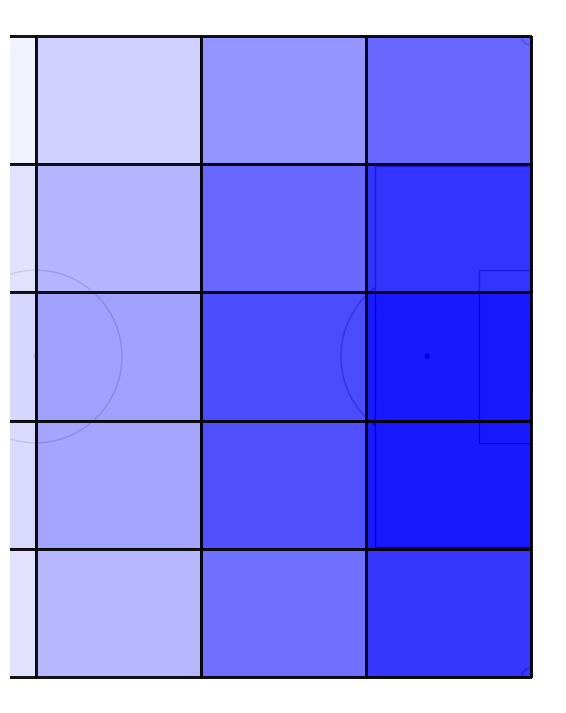

In [107]:
def xA_heatmap(ax,final_df,teams):

    for team in teams:
        teamdf = final_df[(final_df['teamName'] == team) & (final_df['expected_assist'] > 0)]
        cmap = LinearSegmentedColormap.from_list('custom_cmap', ['white','blue'])
        bin_statistic = pitch.bin_statistic(teamdf.x, teamdf.y,values=teamdf['expected_assist'], statistic='sum', bins=(6, 5))
        bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
        pcm = pitch.heatmap(bin_statistic, ax=ax['pitch'], cmap=cmap, edgecolors='black',alpha=0.9,zorder=1)


pitch = Pitch(pitch_type='metricasports',half=True,corner_arcs=True,pitch_length=105, pitch_width=68, pitch_color=background,
              line_color='black', linewidth=1)
fig, ax = pitch.grid(nrows=2, ncols=3, grid_height=0.75, space=0.12, axis=False)
fig.set_size_inches(20, 10)
fig.set_facecolor(background)
ax['pitch'] = ax['pitch'].reshape(-1)

teams = ['Liverpool','Bayern Munich','Barcelona','PSG','Inter','Man City','Real Madrid']
xA_heatmap(ax,final_df,teams)

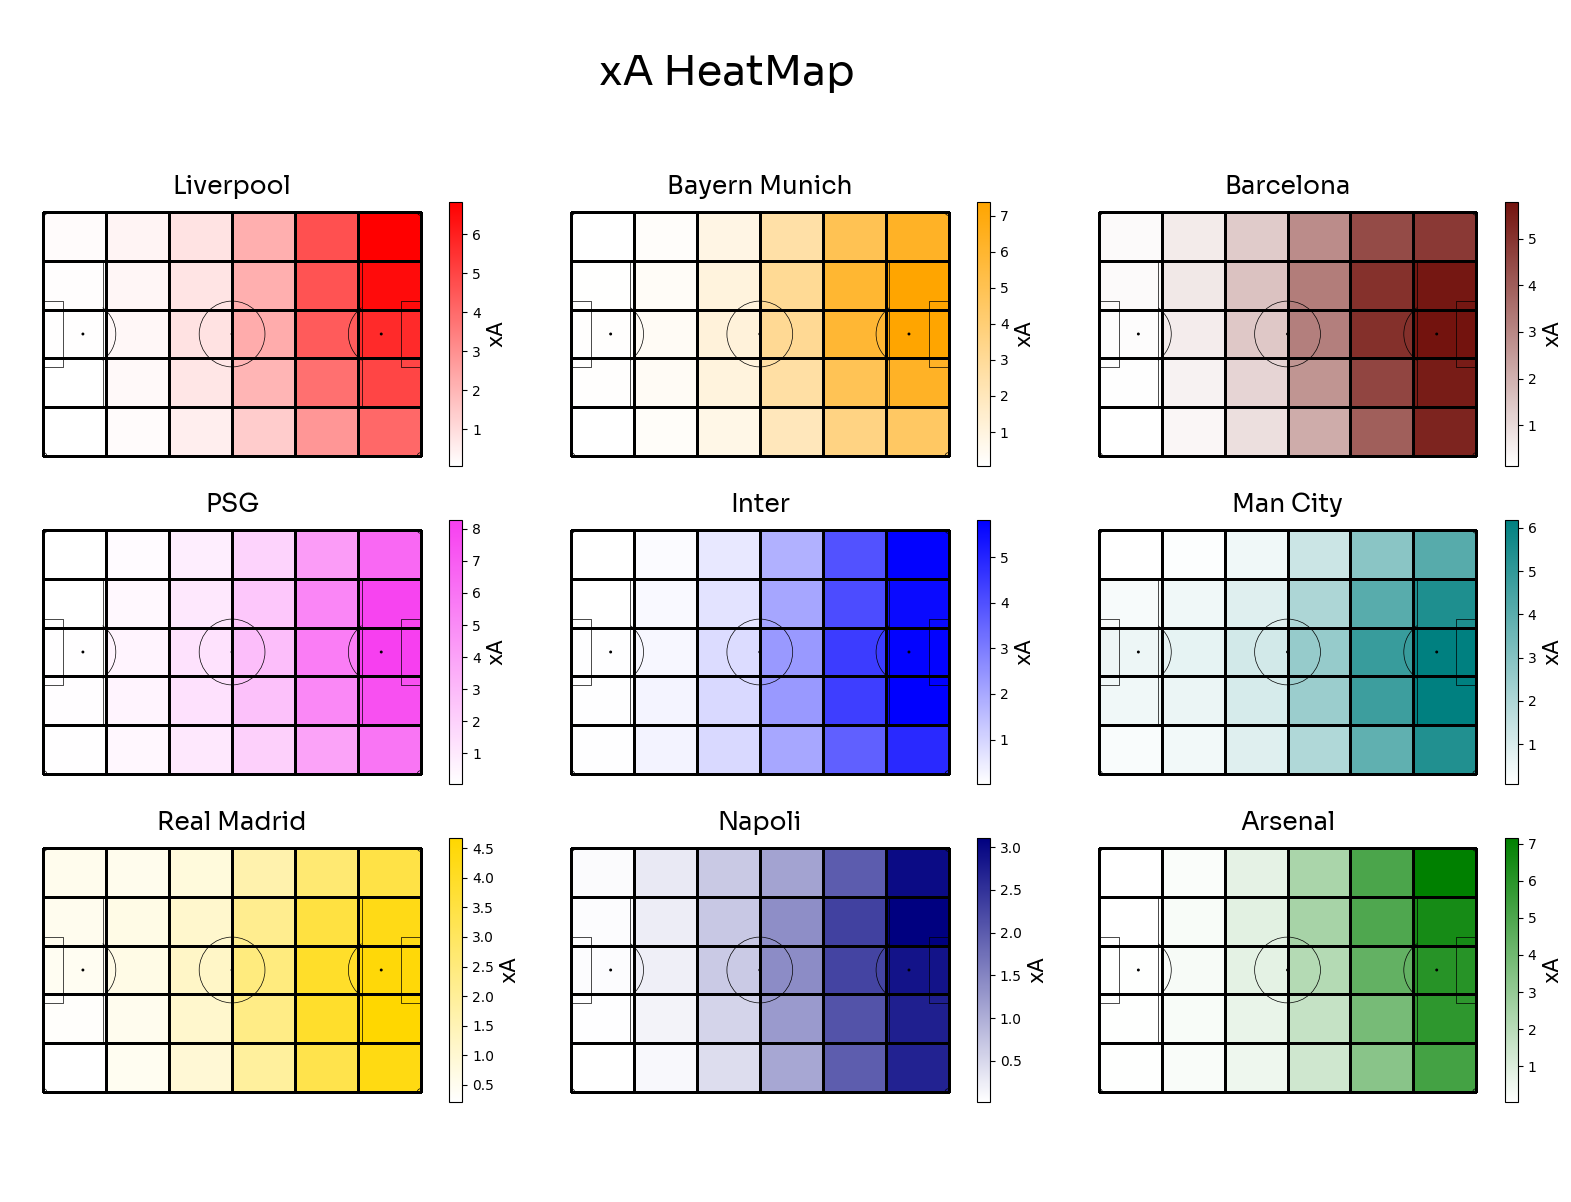

In [131]:
def xA_heatmap(ax, final_df, teams):
    team_cmaps = {
        'Liverpool': LinearSegmentedColormap.from_list('reds', ['white', 'red']),
        'Bayern Munich': LinearSegmentedColormap.from_list('blues', ['white', 'orange']),
        'Barcelona': LinearSegmentedColormap.from_list('purples', ['white', '#73130e']),
        'PSG': LinearSegmentedColormap.from_list('pinks', ['white', '#f73ff0']),
        'Inter': LinearSegmentedColormap.from_list('lightblue', ['white', 'blue']),
        'Man City': LinearSegmentedColormap.from_list('teals', ['white', 'teal']),
        'Real Madrid': LinearSegmentedColormap.from_list('gold', ['white', 'gold']),
        'Napoli': LinearSegmentedColormap.from_list('gold', ['white', 'navy']),
        'Arsenal': LinearSegmentedColormap.from_list('gold', ['white', 'green']),
    }
    for i, team in enumerate(teams):
        teamdf = final_df[(final_df['teamName'] == team) & (final_df['expected_assist'] > 0)]
        
        cmap = team_cmaps.get(team, LinearSegmentedColormap.from_list('default', ['white', 'gray']))
        
        bin_statistic = pitch.bin_statistic(
            teamdf.x, teamdf.y,
            values=teamdf['expected_assist'],  # log-transformed
            statistic='sum',         # average xA per bin
            bins=(6, 5)
        )
        
        bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
        
        pcm = pitch.heatmap(bin_statistic, ax=ax[i], cmap=cmap, edgecolors='black', alpha=1, zorder=0)
        ax[i].set_title(f"{team}",fontproperties=font_prop, fontsize=18)
        
        # Optional: add colorbar
        cbar = fig.colorbar(pcm, ax=ax[i], orientation='vertical', fraction=0.03, pad=0.04)
        cbar.set_label('xA', fontsize=15)

pitch = Pitch(pitch_type='metricasports', half=False, corner_arcs=True,
              pitch_length=105, pitch_width=68, pitch_color='white',
              line_color='black', linewidth=0.5)

fig, ax = pitch.grid(nrows=3, ncols=3, grid_height=0.75, space=0.12, axis=False)
fig.set_size_inches(16, 12)
fig.set_facecolor('white')
ax = ax['pitch'].reshape(-1)
fig.text(0.4, 0.93, 'xA HeatMap', fontweight="bold",fontproperties=font_prop, fontsize=30, color='black')
teams = ['Liverpool', 'Bayern Munich', 'Barcelona', 'PSG', 'Inter', 'Man City', 'Real Madrid', 'Napoli','Arsenal']
xA_heatmap(ax, final_df, teams)
plt.savefig(f'C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Images/Plots/xAHeatMap.png',dpi=500,bbox_inches = 'tight',facecolor=background)

In [137]:
teams = ['Liverpool', 'Bayern Munich', 'Barcelona', 'PSG', 'Inter', 'Man City', 'Real Madrid', 'Napoli', 'Arsenal']

for team in teams:
    teamdf = final_df[(final_df['teamName'] == team)]
    assists = teamdf[teamdf['assist'] == True]
    
    xa_sum = teamdf['expected_assist'].sum()
    assist_count = assists.shape[0]
    
    print(f"{team} -> xA: {xa_sum:.2f}, Assists: {assist_count}")


Liverpool -> xA: 64.34, Assists: 69
Bayern Munich -> xA: 77.57, Assists: 67
Barcelona -> xA: 74.70, Assists: 75
PSG -> xA: 80.55, Assists: 79
Inter -> xA: 64.03, Assists: 61
Man City -> xA: 66.33, Assists: 55
Real Madrid -> xA: 59.19, Assists: 62
Napoli -> xA: 35.61, Assists: 34
Arsenal -> xA: 67.63, Assists: 63


In [135]:
df[(df['teamName'] == 'Liverpool') & (df['assist'] == True)].shape

(74, 265)

In [136]:
final_df[(final_df['teamName'] == 'Liverpool') & (final_df['assist'] == True)].shape

(69, 13)

In [138]:
df_passes[(df_passes['teamName'] == 'Liverpool') & (df_passes['assist'] == True)].shape

(69, 269)

In [139]:
# Group by player
player_grouped = final_df.groupby('playerName').agg(
    total_xA=('expected_assist', 'sum'),
    total_assists=('assist', 'sum')  # assumes 'assist' is boolean or 1/0
).reset_index()

# Sort by total_xA
top_players = player_grouped.sort_values('total_xA', ascending=False).head(10)

In [143]:
print(top_players)

         playerName  total_xA  total_assists
2352  Mohamed Salah    14.210             20
2281  Michael Olise    13.430             13
1831   Lamine Yamal    13.070             13
2725       Raphinha    12.900             15
522     Bukayo Saka    11.485             11
2365  Morgan Rogers    11.200             11
28    Achraf Hakimi    10.960             11
1281    Igor Paixao    10.790             13
1054  Florian Wirtz    10.650             11
2595   Pascal Gross    10.240             10
